In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
def plot_3d(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    Axes3D.scatter(x,y,zs = z)
    plt.show()
    
    
sys.path.append('./util/')
# from util.ImageGenerator import ImageGenerator
# img_gen = ImageGenerator(100,100,100)
# centers = img_gen.make_image_spherical(10, 1, 10)



# Compute centers

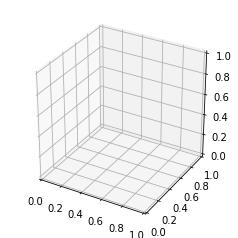

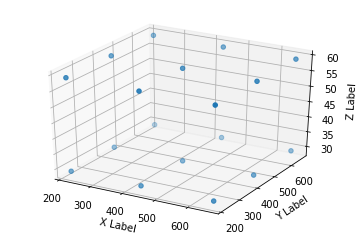

In [2]:
X_RANGE = 1000
Y_RANGE = 1000
Z_RANGE = 100
X_RADI = 200
Y_RADI = 200
Z_RADI = 10
img = np.zeros((X_RANGE, Y_RANGE, Z_RANGE, 3))
tif_img = np.zeros((Z_RANGE, Y_RANGE, X_RANGE, 3))
margin = 20
z_c = Z_RANGE//(Z_RADI + margin)
x_c = X_RANGE//(X_RADI + margin)
y_c = Y_RANGE//(Y_RADI + margin)

centers = []
for k in range(1, z_c):
    z = k*(Z_RADI + margin)-1
    for j in range(1, y_c):
        y = j*(Y_RADI + margin)-1
        for i in range(1, x_c):
            x = i*(X_RADI + margin)-1
            centers.append([x,y,z])
            img[x,y,z,0] = 255
            img[x,y,z,1] = 255
            img[x,y,z,2] = 255
            
            
            tif_img[z,y,x,0] = 255
            tif_img[z,y,x,1] = 255
            tif_img[z,y,x,2] = 255
xs = np.array([x for x,y,z in centers])
ys = np.array([y for x,y,z in centers])
zs = np.array([z for x,y,z in centers])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [ ]:
theta_all = np.linspace(0,  2*np.pi, 500)
theta_pos = np.linspace(np.pi/2,  1.5* np.pi, 500)
theta_neg = np.linspace(1.5* np.pi,  2.5* np.pi, 500)
for center in centers:
    x_c, y_c, z_c = center
    for z_offset in range(-Z_RADI, Z_RADI + 1):
        z = z_c + z_offset
        ro = np.arccos(float(z_offset)/Z_RADI)

        y = Y_RADI * np.sin(theta_pos) * np.sin(ro) + y_c
        x_pos = X_RADI * np.cos(theta_pos) * np.sin(ro) + x_c
        x_neg = X_RADI * np.cos(theta_neg) * np.sin(ro) + x_c
        xx_coord = zip(x_pos, x_neg)
        xy_coord = zip(xx_coord,y)

        for x_pack,y in xy_coord:
            x_pos = x_pack[0]
            x_neg = x_pack[1]
            for x in range(int(x_pos), int(x_neg)):
                tif_img[z,int(y),x,0] = 255
                tif_img[z,int(y),x,1] = 255
                tif_img[z,int(y),x,2] = 255
            
plt.imshow(tif_img[51,:,:,0], 'gray')
plt.show()


In [5]:
from tifffile import imsave
imsave('img.tif', tif_img.astype(np.uint8))

# Sandbox

In [48]:
theta1 = np.linspace(0, np.pi, 100)
theta2 = np.linspace(np.pi/2, 3*np.pi/2, 100)

y_half = [int(x) for x in Y_RADI * np.sin(theta2) * np.sin(np.pi/4)]
y_half.sort()
print(y_half)

[-141, -141, -141, -140, -140, -139, -138, -137, -136, -135, -134, -132, -131, -129, -127, -125, -123, -121, -118, -116, -113, -111, -108, -105, -102, -99, -95, -92, -89, -85, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -41, -37, -33, -28, -24, -20, -15, -11, -6, -2, 2, 6, 11, 15, 20, 24, 28, 33, 37, 41, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 85, 89, 92, 95, 99, 102, 105, 108, 111, 113, 116, 118, 121, 123, 125, 127, 129, 131, 132, 134, 135, 136, 137, 138, 139, 140, 140, 141, 141, 141]


[141, 141, 141, 140, 140, 139, 138, 137, 136, 135, 134, 132, 131, 129, 127, 125, 123, 121, 118, 116, 113, 111, 108, 105, 102, 99, 95, 92, 89, 85, 82, 78, 74, 70, 66, 62, 58, 54, 50, 46, 41, 37, 33, 28, 24, 20, 15, 11, 6, 2, -2, -6, -11, -15, -20, -24, -28, -33, -37, -41, -46, -50, -54, -58, -62, -66, -70, -74, -78, -82, -85, -89, -92, -95, -99, -102, -105, -108, -111, -113, -116, -118, -121, -123, -125, -127, -129, -131, -132, -134, -135, -136, -137, -138, -139, -140, -140, -141, -141, -141]
[0, -4, -8, -13, -17, -22, -26, -31, -35, -39, -44, -48, -52, -56, -60, -64, -68, -72, -76, -80, -83, -87, -90, -94, -97, -100, -103, -106, -109, -112, -115, -117, -120, -122, -124, -126, -128, -130, -132, -133, -135, -136, -137, -138, -139, -139, -140, -140, -141, -141, -141, -141, -140, -140, -139, -139, -138, -137, -136, -135, -133, -132, -130, -128, -126, -124, -122, -120, -117, -115, -112, -109, -106, -103, -100, -97, -94, -90, -87, -83, -80, -76, -72, -68, -64, -60, -56, -52, -48, -44, -39, -

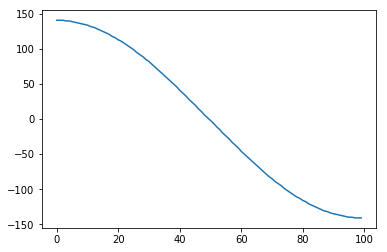

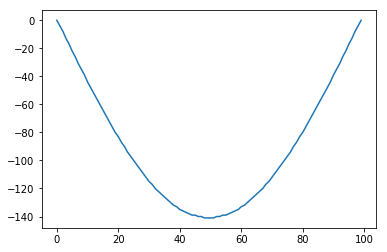

In [53]:
# print([int(x) for x in Y_RADI * np.sin(theta) * np.sin(np.pi/4)])
y_pos = [int(x) for x in Y_RADI * np.sin(theta2) * np.sin(np.pi/4)]
y_all = [int(x) for x in Y_RADI * np.sin(theta) * np.sin(np.pi/4)]
# y_all.sort()
print(y_all)
# y_pos.sort()
print(y_pos)
x_coord = [i for i in range(len(y_all))]
plt.plot(x_coord, y_all)
plt.show()
x_coord = [i for i in range(len(y_pos))]
plt.plot(x_coord, y_pos)
plt.show()
# theta2 = np.linspace(0, -np.pi, 100)
# print([int(x) for x in Y_RADI * np.sin(theta2) * np.sin(np.pi/4)])
# y_neg = [-int(x) for x in Y_RADI * np.sin(theta2) * np.sin(np.pi/4)]
# print(set(y_pos) ^ set(y_neg))

In [37]:
X_RANGE = 100
Y_RANGE = 100
Z_RANGE = 100
pixel_radi = 10
centers = [np.array([50, 50, 50])]
img = np.zeros((X_RANGE, Y_RANGE, Z_RANGE))
theta_all = np.linspace(0,  2*np.pi, 100)
theta_pos = np.linspace(np.pi/2,  1.5* np.pi, 100)
theta_neg = np.linspace(1.5* np.pi,  2.5* np.pi, 100)

for center in centers:
    x_c, y_c, z_c = center
    for z_offset in range(-pixel_radi, pixel_radi + 1):
        z = z_c + z_offset
        ro = np.arccos(float(z_offset)/pixel_radi)
        y = pixel_radi * np.sin(theta_pos) * np.sin(ro) + y_c
        x_pos = pixel_radi * np.cos(theta_pos) * np.sin(ro) + x_c
        x_neg = pixel_radi * np.cos(theta_neg) * np.sin(ro) + x_c
        xx_coord = zip(x_pos, x_neg)
        xy_coord = zip(xx_coord,y)
        
        for x_pack,y in xy_coord:
            x_pos = x_pack[0]
            x_neg = x_pack[1]
            for x in range(int(x_pos), int(x_neg)):
                img[x, int(y), z] = 255
                
#         xy_coord = zip(x_pos,y)
#         for x,y in xy_coord:
#             img[int(x), int(y), z] = 255


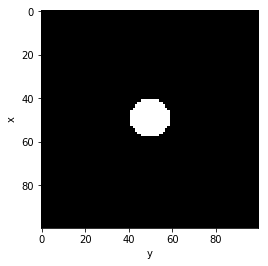

In [38]:
plt.imshow(img[:,:,55],'gray')
plt.ylabel('x')
plt.xlabel('y')
plt.show()

In [84]:
print(img[:,:,40])

[[ 255.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]]


[ 10.           9.97986676   9.91954813   9.81928697   9.67948701
   9.50071118   9.28367933   9.02926538   8.73849377   8.41253533
   8.05270258   7.66044443   7.23734038   6.78509412   6.30552667
   5.8005691    5.27225468   4.72271075   4.15415013   3.56886222
   2.96920375   2.35758936   1.73648178   1.108382     0.47581916
  -0.15865964  -0.79249957  -1.42314838  -2.04806668  -2.66473814
  -3.27067963  -3.86345126  -4.44066613  -5.          -5.53920064
  -6.05609687  -6.54860734  -7.01474888  -7.4526445   -7.86053095
  -8.23676581  -8.57983413  -8.88835449  -9.16108457  -9.39692621
  -9.59492974  -9.75429787  -9.87438889  -9.95471923  -9.99496542
  -9.99496542  -9.95471923  -9.87438889  -9.75429787  -9.59492974
  -9.39692621  -9.16108457  -8.88835449  -8.57983413  -8.23676581
  -7.86053095  -7.4526445   -7.01474888  -6.54860734  -6.05609687
  -5.53920064  -5.          -4.44066613  -3.86345126  -3.27067963
  -2.66473814  -2.04806668  -1.42314838  -0.79249957  -0.15865964
   0.47581

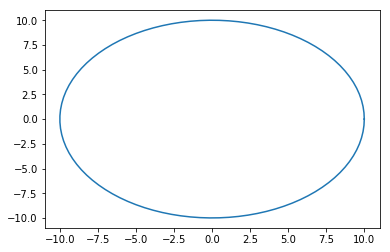

In [69]:
z_offset = 0
z = 0
ro = np.arccos(float(z_offset)/pixel_radi)
y = pixel_radi * np.sin(theta) * np.sin(ro)
x = pixel_radi * np.cos(theta) * np.sin(ro)
print(x)
print(y)
xy_coord = zip(x,y)
plt.plot(x, y)
plt.show()